In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bin_file_path = r"C:\Users\leroquan\Documents\python\preprocessing-mitgcm\99-output\binary_data\atemp.bin"

In [3]:
with open(bin_file_path, 'rb') as fid:
    binary_data = np.fromfile(fid, dtype='>f8')

In [4]:
nx = 1344 / 4
ny = 528 / 4
nt = len(binary_data) / nx /ny

print(f'nx = {nx}, ny= {ny}, nt = {nt}' )

nx = 336.0, ny= 132.0, nt = 96.0


In [5]:
nt / 24

4.0

In [6]:
from datetime import datetime, timedelta

start_date = datetime(2024, 4, 1)

date_list = []
for i in range(0, int(nt)):
    current_date = start_date + timedelta(hours=i)
    date_list.append(current_date)

In [7]:
date_list[-1]

datetime.datetime(2024, 4, 4, 23, 0)

In [8]:
bin_array = np.reshape(binary_data, (int(nt),int(ny),int(nx)))

In [9]:
i_time = -1

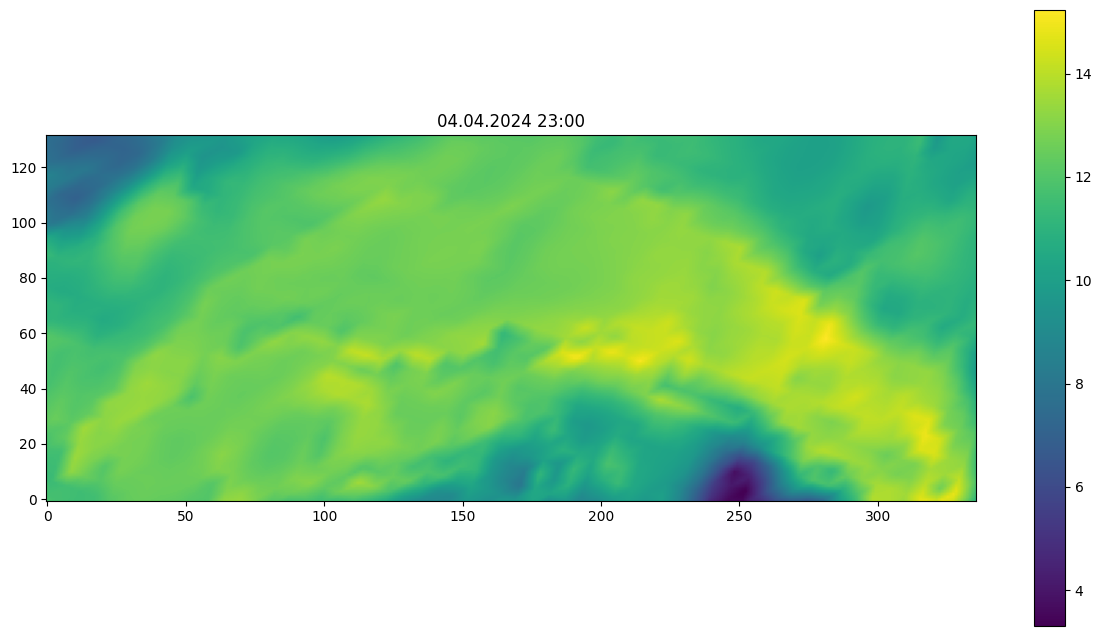

In [10]:
fig = plt.figure(figsize=(15,8))
plt.imshow(bin_array[i_time,:,:]-273.15)
plt.gca().invert_yaxis()
plt.title(date_list[i_time].strftime('%d.%m.%Y %H:%M'))
plt.colorbar()

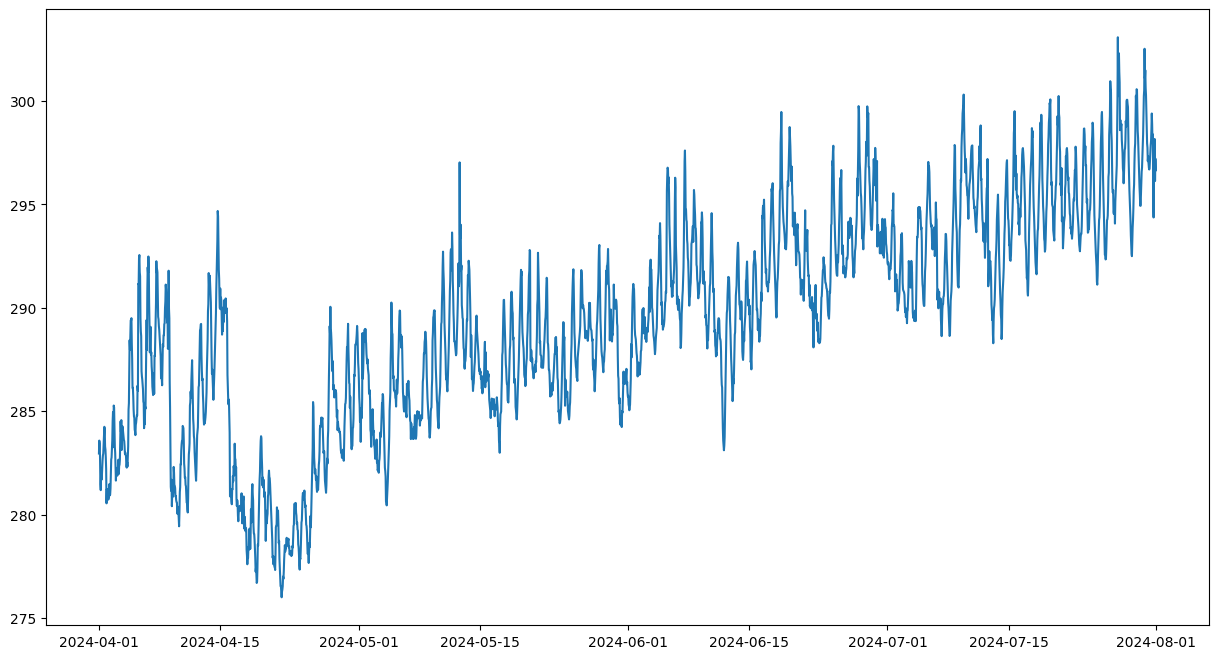

In [17]:
plt.figure(figsize=(15,8))
plt.plot(date_list, bin_array[:,80,150])

# Radiation

In [2]:
var = 'atemp'

In [89]:
bin_file_path_rad = rf"D:\geneva_200m_winter2023\inputs\{var}.bin"
dtype='<f8'

In [101]:
bin_file_path_rad = rf"C:\Users\leroquan\Documents\python\preprocessing-mitgcm\surface_forcings\output\binary_data\input_mitgcm_cosmo_20231201_20231203_200m\{var}.bin"
dtype='>f8'

In [17]:
bin_file_path_rad = rf"C:\Users\leroquan\Documents\python\preprocessing-mitgcm\99-output\binary_data\{var}.bin"
dtype='>f8'

In [18]:
with open(bin_file_path_rad, 'rb') as fid:
    binary_data_rad = np.fromfile(fid, dtype=dtype)

In [19]:
nx = 1344 / 4
ny = 528 / 4
nt = len(binary_data_rad) / nx /ny

print(f'nx = {nx}, ny= {ny}, nt = {nt}' )

nx = 336.0, ny= 132.0, nt = 2952.0


In [20]:
bin_array_rad = np.reshape(binary_data_rad, (int(nt),int(ny),int(nx)))

In [13]:
plt.figure(figsize=(15,8))
plt.plot(bin_array_rad[:48,80,150])

NameError: name 'bin_array_rad' is not defined

<Figure size 1500x800 with 0 Axes>

NameError: name 'date_list' is not defined

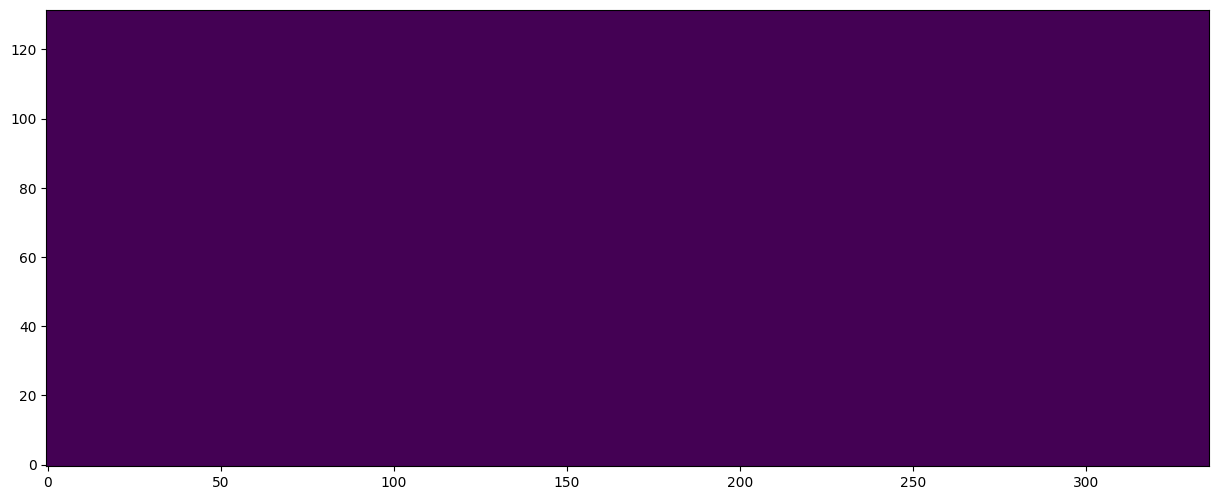

In [19]:
i_time = 1
plt.figure(figsize=(15,8))
plt.imshow(bin_array_rad[i_time,:,:])
plt.gca().invert_yaxis()
plt.title(date_list[i_time])
plt.colorbar()

In [48]:
bin_array_rad.max()

532.7596489152544

In [ ]:
plt.plot(binary_data)

In [ ]:
binary_data